# FINAL NOTEBOOK

Here is the summary of my work for this project. I have included the necessary code, the tools to import so that you can run said code, as well as justification for my decisions. 

Nearly everyone has been here. You're at the mall, decide to splurge, maybe on some concert tickets, a fresh new pair of shoes, some designer jeans, whatever. You get to the register all set to make your purchase and, whoops, CARD DECLINED. You try your card again, and still, declined. You panic, frantically checking your account to make sure that you haven't been hacked, search for other cards in your wallet that don't exist. The cashier stares at you, awkwardly, before nodding to the person behind you in line to take your place. That is, until you get a text from the bank: "Did you try to make this purchase?" Releived you select yes, hop back in line, swipe your card and all is well. 

It's annoying in the moment, but this techonology saves consumers and businessees billions of dollars each year. Further, the Machine Learning behind the technology is designed so that so that it must not miss fraud, for obvious reasons, which that it may flag purchases needlessly. But what if we could build a model, that was just as good at detecting fraud, while not embarassing innocent folks in the mall. This is what I sought out to do. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


All of the data can be found [here](https://www.kaggle.com/c/ieee-fraud-detection/data). For this project, I am only going to use the Train_transaction dataset.  Let's go ahead and read it in.  

# EDA and Feature Engineering

In [2]:
#load dataframe
df_tr = pd.read_csv('/Users/kaoliver/Downloads/ieee-fraud-detection/train_transaction.csv')

In [3]:
#check top of frame
df_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The target variable appears to be the IsFraud column.  

In [4]:
#check info
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [5]:
#check shape
df_tr.shape

(590540, 394)

In [6]:
#check columns
list(df_tr.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

Here is a breakdown of what the columns represent, taken from from the Kaggle Competition discussion board. 

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”

dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. for both purchaser and recipient. 

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

In [7]:
#check the sum of null values by feature
df_tr.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

Whats going on with the Vesta features. Seems like there are a massive amount of Null values. 

In [8]:
#check the sum of null values 
df_tr['V200'].isnull().sum()


450721

In [9]:
#check the sum of null values 
df_tr['V100'].isnull().sum()

314

In [10]:
#check the sum of null values 
df_tr['V150'].isnull().sum()

508589

In [11]:
#check the sum of null values 
df_tr['V99'].isnull().sum()

314

In [12]:
#check the sum of null values 
df_tr['V101'].isnull().sum()

314

In [13]:
#check the sum of null values 
df_tr['V1'].isnull().sum()

279287

Yuck, so many null values. Let's get rid of them and maybe bring them back at a later date.

In [14]:
#delete Vesta features 
df_tr_2 = df_tr.drop(df_tr.loc[:, 'V1':'V339'].columns, axis = 1)

In [15]:
df_tr_2.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,315.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alright, thats a much more manageable set of features. 

In [16]:
#check shape of new dataframe 
df_tr_2.shape

(590540, 55)

In [17]:
#check info
df_tr_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           581607 non-null  float64
 7   card3           588975 non-null  float64
 8   card4           588963 non-null  object 
 9   card5           586281 non-null  float64
 10  card6           588969 non-null  object 
 11  addr1           524834 non-null  float64
 12  addr2           524834 non-null  float64
 13  dist1           238269 non-null  float64
 14  dist2           37627 non-null   float64
 15  P_emaildomain   496084 non-null  object 
 16  R_emaildomain   137291 non-null  object 
 17  C1        

Now, according to Vesta, the categorical features are :  

productCD, 
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9.

Let's get rid of those, and try to have a nice and clean purely numerical dataset for our First Simple Model.  

In [18]:
#create new dataframe of only numeric values

df_tr_3 = df_tr_2.drop(columns = ['TransactionID', 'ProductCD', 'card1', 'card2', 'card3', 
                                  'card4', 'card5','card6', 'addr1', 'addr2', 
                                  'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

In [19]:
#check five rows from the dataframe
df_tr_3.sample(5)

,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
397171,0,10006065,179.95,NaN,NaN,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
244068,0,5790598,61.81,NaN,NaN,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
456772,0,11672947,82.00,NaN,NaN,5.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,298.0
206086,0,4738111,39.00,NaN,NaN,1.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,425.0
261252,0,6285527,59.00,5.0,NaN,2.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [20]:
#check top five rows 
df_tr_3.head()

,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,0,86400,68.5,19.0,NaN,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0,86401,29.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0,86469,59.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,0,86499,50.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0,86506,50.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#check info
df_tr_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         590540 non-null  int64  
 1   TransactionDT   590540 non-null  int64  
 2   TransactionAmt  590540 non-null  float64
 3   dist1           238269 non-null  float64
 4   dist2           37627 non-null   float64
 5   C1              590540 non-null  float64
 6   C2              590540 non-null  float64
 7   C3              590540 non-null  float64
 8   C4              590540 non-null  float64
 9   C5              590540 non-null  float64
 10  C6              590540 non-null  float64
 11  C7              590540 non-null  float64
 12  C8              590540 non-null  float64
 13  C9              590540 non-null  float64
 14  C10             590540 non-null  float64
 15  C11             590540 non-null  float64
 16  C12             590540 non-null  float64
 17  C13       

Next, lets deal with the Null values.

In [22]:
#check for null values 
df_tr_3.isnull().sum()

isFraud                0
TransactionDT          0
TransactionAmt         0
dist1             352271
dist2             552913
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614
D10                76022
D11               279287
D12               525823
D13               528588
D14               528353
D15                89113
dtype: int64

Our Null values range from none in some columns, to more than 500,000 in some others. I don't want 
to remove any more columns, but I also may not have a very indicative model if I drop this many rows. So Let's fill them instead using the interpolate method, and pad the NA's with data already in the dataset.    

In [23]:
#create new dataframe with values for NaNs
df_tr_4 = df_tr_3.interpolate(axis=0, method='pad')

In [24]:
#check sample of new dataframe
df_tr_4.sample(10)

,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
49008,0,1177566,12.00,1.0,3.0,7.0,10.0,0.0,3.0,0.0,...,365.0,365.0,663.625000,0.625000,0.0,0.0,0.0,0.0,0.0,0.0
391718,0,9833233,107.95,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,33.0,0.0,7.791666,0.791666,0.0,460.0,33.0,7.0,7.0,0.0
553392,0,14615342,884.00,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,9.0,9.0,0.125000,0.125000,313.0,0.0,9.0,0.0,0.0,313.0
117692,0,2304152,29.00,23.0,12.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.666666,0.666666,32.0,0.0,0.0,0.0,0.0,387.0
2776,0,149371,97.00,11.0,508.0,1.0,1.0,0.0,0.0,0.0,...,2.0,2.0,165.708328,0.708333,0.0,28.0,2.0,254.0,0.0,393.0
248818,0,5935326,29.00,32.0,68.0,11.0,7.0,0.0,0.0,0.0,...,0.0,5.0,5.666666,0.666666,388.0,133.0,0.0,0.0,0.0,388.0
42150,0,1023946,25.95,173.0,1.0,4.0,2.0,0.0,0.0,2.0,...,0.0,0.0,294.833344,0.833333,239.0,0.0,0.0,364.0,0.0,458.0
195059,0,4392572,161.00,19.0,286.0,2.0,2.0,0.0,0.0,0.0,...,455.0,8.0,1171.833374,0.833333,226.0,0.0,455.0,8.0,140.0,226.0
371502,0,9239270,29.00,0.0,14.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,106.916664,0.916666,72.0,3.0,0.0,0.0,0.0,72.0
73422,0,1628662,100.00,40.0,2098.0,1.0,1.0,0.0,1.0,0.0,...,0.0,229.0,151.833328,0.833333,129.0,112.0,0.0,0.0,0.0,213.0


In [25]:
#check null values
df_tr_4.isnull().sum()

isFraud            0
TransactionDT      0
TransactionAmt     0
dist1              0
dist2             11
C1                 0
C2                 0
C3                 0
C4                 0
C5                 0
C6                 0
C7                 0
C8                 0
C9                 0
C10                0
C11                0
C12                0
C13                0
C14                0
D1                 0
D2                 3
D3                 0
D4                 1
D5                 3
D6                10
D7                10
D8                10
D9                10
D10                0
D11                0
D12               10
D13               10
D14               10
D15                0
dtype: int64

In [26]:
#drop remaining NaN values
df_tr_4=df_tr_4.dropna(axis=0)

In [27]:
df_tr_4.sample(10)

,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
86604,0,1820654,150.00,17.0,27.0,1.0,1.0,0.0,1.0,0.0,...,0.0,72.0,7.041666,0.041666,11.0,101.0,0.0,0.0,0.0,11.0
353051,0,8713135,107.95,5.0,15.0,5.0,2.0,0.0,0.0,1.0,...,42.0,0.0,4.833333,0.833333,422.0,421.0,0.0,3.0,42.0,422.0
444292,0,11301076,57.95,11.0,437.0,3.0,4.0,0.0,0.0,1.0,...,0.0,10.0,493.791656,0.791666,34.0,305.0,509.0,0.0,0.0,370.0
386954,0,9691980,32.97,991.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,2.166666,0.166666,531.0,156.0,0.0,0.0,0.0,69.0
71582,0,1611978,17.00,7.0,26.0,2.0,1.0,0.0,1.0,0.0,...,0.0,123.0,78.625000,0.625000,16.0,0.0,409.0,0.0,16.0,16.0
153018,0,3173714,226.00,22.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,43.708332,0.708333,251.0,251.0,0.0,0.0,0.0,251.0
189309,0,4227584,417.95,343.0,7.0,1.0,1.0,0.0,0.0,1.0,...,424.0,8.0,362.916656,0.916666,0.0,0.0,424.0,362.0,0.0,0.0
30574,0,765226,25.00,0.0,7.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,18.833332,0.833333,0.0,0.0,0.0,0.0,0.0,0.0
393461,0,9873906,335.00,8.0,196.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,395.250000,0.250000,0.0,0.0,272.0,0.0,367.0,0.0
474000,0,12251746,150.00,23.0,191.0,1.0,1.0,0.0,1.0,0.0,...,197.0,2.0,384.791656,0.791666,269.0,269.0,197.0,0.0,0.0,262.0


There we go, a null-free data set. Before we model let's investigate our class imbalance. 

<AxesSubplot:ylabel='isFraud'>

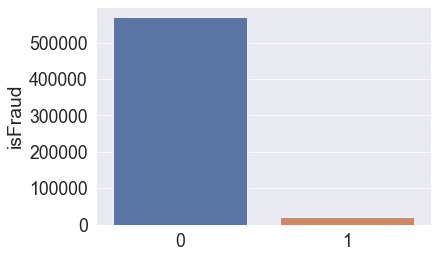

In [28]:
#plot class imbalance 

sns.set(style='darkgrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=2.0)  
sns.barplot(x=df_tr_4['isFraud'].value_counts().index, 
            y=df_tr_4['isFraud'].value_counts())

In [29]:
#bring back dataframe  
df_tr_2.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
202588,3189588,0,4640784,1498.710,W,3821,111.0,150.0,mastercard,219.0,...,0.0,T,T,T,NaN,NaN,F,F,F,F
290467,3277467,0,7157375,26.950,W,7676,512.0,150.0,visa,226.0,...,5.0,T,F,F,NaN,NaN,T,NaN,NaN,NaN
112217,3099217,0,2180808,50.000,H,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182678,3169678,0,4045143,14.458,C,16746,500.0,185.0,mastercard,102.0,...,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
371430,3358430,0,9238195,226.000,W,5167,361.0,150.0,visa,195.0,...,42.0,T,T,T,M0,T,T,F,F,T


Null values are but we can take care of those. 

In [30]:
#create new dataframe

df_tr_5 = df_tr_2.interpolate(axis=0, method='pad')

In [31]:
#
df_tr_5.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
362586,3349586,0,8987147,59.00,W,9500,321.0,150.0,visa,226.0,...,350.0,T,T,T,M0,T,F,F,F,T
163510,3150510,0,3458337,194.95,W,15457,555.0,150.0,visa,226.0,...,517.0,T,T,T,M1,T,T,F,F,T
197285,3184285,0,4465597,54.00,W,3898,281.0,150.0,visa,226.0,...,239.0,T,T,T,M0,T,T,T,T,T
190722,3177722,0,4285687,57.95,W,2803,100.0,150.0,visa,226.0,...,0.0,T,T,T,M0,T,T,F,T,T
480041,3467041,0,12464868,20.95,W,9992,455.0,150.0,mastercard,126.0,...,110.0,T,T,T,M0,T,F,T,T,T


The TransactionID column needs to be removed, and will not be in either dataset.

In [32]:
df_tr_5 = df_tr_5.drop(columns='TransactionID')

In [33]:
df_tr_5.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,0.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.0,T,T,T,M0,T,T,NaN,NaN,NaN
2,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,315.0,T,T,T,M0,F,F,F,F,F
3,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,111.0,T,T,T,M0,T,F,F,F,F
4,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,111.0,T,T,T,M0,T,F,F,F,F


In [34]:
df_tr_5['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

I'm interested in investigating whether or not there is any correlation between the product code and 
fraudulent transactions

<AxesSubplot:xlabel='ProductCD'>

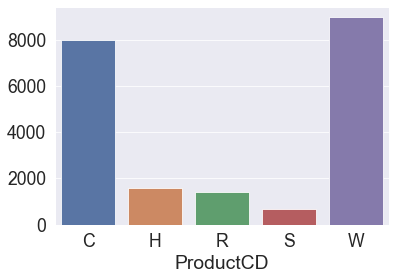

In [35]:
fr_by_pr = df_tr_5.groupby('ProductCD').sum().isFraud

sns.set(style='darkgrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=2.0)  
sns.barplot(x=fr_by_pr.index, 
            y=fr_by_pr.values)




Well,it seems, the rate of Fraudulent transactions is relatively normal throughout, still
W and C are well ahead of the pack. Moving On


In [36]:
df_tr_5.isnull().sum()

isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
card1              0
card2              1
card3              0
card4              0
card5              0
card6              0
addr1              0
addr2              0
dist1              0
dist2             11
P_emaildomain      1
R_emaildomain     10
C1                 0
C2                 0
C3                 0
C4                 0
C5                 0
C6                 0
C7                 0
C8                 0
C9                 0
C10                0
C11                0
C12                0
C13                0
C14                0
D1                 0
D2                 3
D3                 0
D4                 1
D5                 3
D6                10
D7                10
D8                10
D9                10
D10                0
D11                0
D12               10
D13               10
D14               10
D15                0
M1                 0
M2                 0
M3           

In [37]:
df_tr_5 = df_tr_5.dropna(axis=0)

In [38]:
df_tr_5.isnull().sum()

isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dist1             0
dist2             0
P_emaildomain     0
R_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D7                0
D8                0
D9                0
D10               0
D11               0
D12               0
D13               0
D14               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0


Alright, the NA's are taken care of, for now. Let's begin preprocessing our model. 

# Preprocessing

Alright, like usual gotta perform the train test split

In [39]:
#Separate target variable and perform train test split

X = df_tr_5.drop(columns='isFraud', axis=1)
y = df_tr_5['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [40]:
#check shape
X_train.shape



(442896, 53)

In [41]:
y_train.shape

(442896,)

In [42]:
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
4570,166961,844.95,W,2795,174.0,150.0,visa,141.0,credit,269.0,...,118.0,T,F,F,M0,F,F,F,F,T
77328,1699272,250.00,R,15063,514.0,150.0,visa,226.0,credit,269.0,...,81.0,T,F,F,M2,F,T,F,T,T
449149,11459346,48.95,W,13597,198.0,150.0,visa,226.0,debit,191.0,...,611.0,T,T,T,M1,T,T,T,T,T
333089,8199474,108.95,W,17399,111.0,150.0,mastercard,224.0,debit,251.0,...,206.0,T,T,T,M0,F,F,T,T,T
321969,8006985,59.00,W,17055,393.0,150.0,mastercard,117.0,debit,325.0,...,574.0,T,F,F,M0,T,F,F,F,F


Alright, now were going to create a dataframe of simply numerical columns to train our data on

In [43]:
X_tr_num = X_train.drop(columns=['ProductCD', 'card1', 'card2', 'card3', 
                                  'card4', 'card5','card6', 'addr1', 'addr2', 
                                  'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

In [44]:
X_tr_num.columns

Index(['TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14', 'D15'],
      dtype='object')

In [45]:
X_tr_num.sample(10)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
289172,7125922,35.950,380.0,7.0,13.0,15.0,0.0,0.0,26.0,9.0,...,11.0,11.0,11.333333,0.333333,0.0,506.0,11.0,11.0,0.0,238.0
446188,11369818,37.011,12.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,321.0,43.583332,0.583333,0.0,178.0,0.0,0.0,0.0,0.0
585964,15688371,662.950,11.0,6.0,2.0,2.0,0.0,0.0,3.0,1.0,...,29.0,0.0,145.541672,0.541666,0.0,160.0,29.0,29.0,0.0,0.0
106234,2120918,100.000,885.0,202.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,286.0,245.541672,0.541666,0.0,208.0,0.0,0.0,0.0,0.0
389954,9773609,35.950,878.0,0.0,5.0,4.0,0.0,0.0,1.0,3.0,...,154.0,0.0,0.083333,0.083333,27.0,0.0,154.0,0.0,0.0,27.0
454314,11627232,82.000,1.0,80.0,5.0,2.0,0.0,0.0,0.0,1.0,...,15.0,6.0,100.541664,0.541666,168.0,199.0,15.0,15.0,0.0,199.0
360908,8959007,47.950,4.0,656.0,8.0,9.0,0.0,0.0,4.0,5.0,...,0.0,0.0,124.666664,0.666666,0.0,69.0,0.0,0.0,0.0,0.0
476451,12334623,171.000,7.0,792.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,145.750000,0.750000,0.0,0.0,0.0,0.0,135.0,0.0
393909,9905271,290.950,1.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,...,0.0,8.0,226.625000,0.625000,57.0,323.0,0.0,0.0,1.0,323.0
461225,11844610,22.133,2.0,108.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,10.083333,0.083333,0.0,0.0,0.0,0.0,10.0,0.0


Alright, bueno. Now it's time to scale


In [46]:
#initiate Scaler

sc = StandardScaler()

#scale the data
X_tr_sca = pd.DataFrame(sc.fit_transform(X_tr_num), index= X_tr_num.index, 
                       columns= X_tr_num.columns)

In [47]:
X_tr_sca.sample(10)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
201619,-0.602658,-0.360646,-0.222963,-0.412310,-0.089815,-0.078800,-0.036784,-0.059372,-0.099390,-0.112030,...,-0.503600,2.816540,-0.119590,-1.566253,2.347626,-0.789228,-0.441522,-0.281260,-0.419314,0.278401
168391,-0.813917,0.384312,-0.258029,-0.412310,-0.097165,-0.091513,-0.036784,-0.059372,-0.177173,-0.112030,...,-0.503600,-0.469619,3.305550,0.672637,-0.205760,-0.789228,-0.441522,-0.281260,-0.419314,-0.389087
56915,-1.312881,-0.145289,-0.209476,-0.384750,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,2.885815,0.861140,0.560673,-1.434553,2.331118,-0.789228,-0.441522,-0.281260,-0.419314,1.890263
517610,1.338911,-0.319271,-0.317373,-0.360864,-0.097165,-0.091513,-0.036784,-0.059372,-0.177173,-0.125815,...,-0.503600,3.287284,-0.644452,1.067735,0.069389,-0.040564,-0.441522,-0.281260,-0.419314,-0.141869
501412,1.247482,-0.485272,-0.258029,-0.384750,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,-0.503600,-0.198035,-0.514139,-1.829651,-0.679017,-0.783723,-0.441522,-0.281260,-0.419314,-0.814302
26357,-1.450221,-0.397677,-0.298491,-0.412310,-0.089815,-0.085157,-0.036784,-0.059372,-0.216065,-0.112030,...,-0.503600,-0.469619,-0.623335,0.672637,-0.679017,-0.789228,-0.441522,-0.281260,-0.419314,0.575063
23701,-1.465594,-0.352164,4.494828,-0.412310,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.125815,...,1.820040,-0.406249,-0.574964,1.199436,1.505669,-0.789228,2.480168,4.358060,-0.419314,0.041072
399972,0.588333,1.145406,-0.252634,-0.425172,-0.075114,-0.091513,-0.036784,-0.059372,-0.138282,-0.112030,...,-0.503600,-0.469619,-0.640662,0.672637,2.518219,2.254971,-0.441522,-0.281260,-0.412265,2.058371
28406,-1.442615,-0.228039,-0.285004,-0.291044,-0.089815,-0.085157,-0.036784,-0.059372,-0.216065,-0.112030,...,1.268562,1.404306,0.248968,-1.302855,-0.634993,0.746634,1.786754,2.279645,-0.419314,-0.774748
202348,-0.592571,-0.451671,-0.282306,-0.412310,-0.097165,-0.091513,-0.036784,-0.059372,-0.177173,-0.112030,...,1.553596,-0.107508,-0.472446,0.145841,-0.679017,-0.789228,2.145148,0.213601,2.343806,-0.814302


Nice and Scaled

In [48]:
X_tr_sca.shape

(442896, 33)

Alright, now we move to the categorical columns where we will OneHotEncode certain data. Let's create the DataFrame first.

In [49]:
X_tr_cat = X_train.drop(columns=['TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1',
                        'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
                        'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 
                        'D10', 'D11', 'D12', 'D13', 'D14', 'D15'])

In [50]:
X_tr_cat.sample(10)

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
237037,W,16568,321.0,150.0,visa,195.0,debit,512.0,87.0,comcast.net,anonymous.com,T,T,T,M0,T,T,F,F,T
588891,W,16075,514.0,150.0,mastercard,102.0,credit,123.0,87.0,gmail.com,anonymous.com,T,T,T,M0,F,F,F,T,T
90691,R,16659,170.0,150.0,visa,226.0,credit,441.0,87.0,yahoo.com,yahoo.com,T,T,T,M2,F,F,F,T,T
322593,W,5033,269.0,150.0,mastercard,224.0,debit,123.0,87.0,gmail.com,gmail.com,T,T,T,M0,T,F,F,F,F
80894,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,yahoo.es,anonymous.com,T,T,T,M0,T,F,F,T,T
552677,W,1359,314.0,150.0,mastercard,224.0,debit,299.0,87.0,hotmail.com,hotmail.com,T,F,F,M0,F,T,F,F,T
250904,H,4151,404.0,150.0,mastercard,102.0,credit,204.0,87.0,att.net,live.com,T,T,T,M2,T,T,F,F,F
199315,W,10112,360.0,150.0,visa,166.0,debit,299.0,87.0,gmail.com,hotmail.com,T,T,T,M0,F,F,F,F,T
139521,W,9112,250.0,150.0,visa,226.0,debit,441.0,87.0,yahoo.com,gmail.com,T,F,F,M0,T,F,F,F,T
534019,W,7420,555.0,150.0,visa,226.0,debit,170.0,87.0,hotmail.com,yahoo.com,T,T,F,M0,T,F,T,T,T


Before I OneHotEncode, I need to check the value counts of every column with numbers. If there are enough unique values, than OHE will cause more problems than it helps. 

In [51]:
X_tr_cat['card1'].value_counts()

7919     11296
9500     10691
17188     7803
15885     7727
15066     5886
         ...  
6876         1
3694         1
16319        1
12138        1
5534         1
Name: card1, Length: 12586, dtype: int64

In [52]:
X_tr_cat['card1'].value_counts().shape

(12586,)

WHOA, so i'm not going to OneHotEncode that column. Let's check some others 

In [53]:
X_tr_cat['card2'].value_counts()

321.0    37376
111.0    34243
555.0    31712
490.0    29009
583.0    16728
         ...  
230.0       31
153.0       27
447.0       26
473.0       13
582.0        8
Name: card2, Length: 500, dtype: int64

In [54]:
X_tr_cat['card2'].value_counts().shape

(500,)

In [55]:
X_tr_cat['card3'].value_counts()

150.0    392009
185.0     42388
106.0      1171
146.0       953
144.0       905
          ...  
175.0         1
174.0         1
172.0         1
170.0         1
202.0         1
Name: card3, Length: 109, dtype: int64

In [56]:
X_tr_cat['card3'].value_counts().shape

(109,)

In [57]:
X_tr_cat['card5'].value_counts()

226.0    223965
224.0     61403
166.0     43273
102.0     21981
117.0     19627
          ...  
167.0         1
105.0         1
165.0         1
204.0         1
158.0         1
Name: card5, Length: 118, dtype: int64

In [58]:
X_tr_cat['card5'].value_counts().shape

(118,)

In [59]:
X_tr_cat['addr1'].value_counts()

299.0    39729
325.0    35937
204.0    35324
264.0    33987
330.0    21886
         ...  
351.0        1
113.0        1
127.0        1
341.0        1
376.0        1
Name: addr1, Length: 300, dtype: int64

In [60]:
X_tr_cat['addr1'].value_counts().shape

(300,)

In [61]:
X_tr_cat['addr2'].value_counts()

87.0    439439
60.0      2421
96.0       513
32.0        70
65.0        64
         ...  
70.0         1
83.0         1
84.0         1
49.0         1
25.0         1
Name: addr2, Length: 69, dtype: int64

In [62]:
X_tr_cat['addr2'].value_counts().shape

(69,)

Alright, the rest look fine. So we're going, OneHotEncode every category besides card1. 

In [63]:

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_tr_cat_ohe=pd.DataFrame(ohe.fit_transform(X_tr_cat[['ProductCD', 'card2', 'card3', 
                                  'card4', 'card5','card6', 'addr1', 'addr2', 
                                  'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9']]))

In [64]:
X_tr_cat_ohe.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246
437737,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
62409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
288915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
128999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
108239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
205587,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
252013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
426927,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
140642,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
160366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


And voila! Here is our preprocessed categorical dataset. Now let's join it with the numerical one and keep
it moving

In [65]:
X_tr_final = X_tr_sca.join(X_tr_cat_ohe)
X_tr_final.sample(10)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246
8281,-1.541864,-0.333546,6.086306,-0.151405,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.11203,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
233090,-0.401506,-0.335738,-0.317373,-0.412310,-0.089815,-0.085157,-0.036784,-0.059372,-0.177173,-0.11203,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
509361,1.294063,0.326387,-0.317373,-0.412310,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.11203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590344,1.825657,0.475337,-0.287701,-0.408635,-0.067764,-0.066087,6.195533,-0.045072,-0.216065,-0.08446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328272,0.155060,1.282151,-0.309280,-0.044838,-0.089815,-0.078800,-0.036784,-0.059372,-0.216065,-0.11203,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
517901,1.340193,0.251912,-0.320070,-0.059537,-0.089815,-0.085157,-0.036784,-0.059372,-0.216065,-0.08446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248002,-0.320854,6.271985,-0.314675,-0.408635,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.11203,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
279644,-0.121598,0.746220,-0.295793,-0.423334,-0.097165,-0.091513,-0.036784,-0.059372,-0.177173,-0.11203,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
212920,-0.527971,-0.513693,0.081846,-0.324117,-0.089815,-0.066087,-0.036784,-0.045072,-0.216065,-0.11203,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
144125,-0.954918,-0.526473,-0.298491,-0.419660,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.11203,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Alright, now lets repeat all of the preprocessing, just with the test set. 

In [66]:
X_test.shape

(147633, 53)

In [67]:
X_test.sample(8)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
218108,5091794,159.950,W,9426,555.0,150.0,visa,226.0,debit,204.0,...,268.0,T,T,F,M0,T,T,F,F,T
2972,151161,67.950,W,2751,555.0,150.0,visa,226.0,debit,436.0,...,483.0,T,F,F,M0,T,T,F,F,F
43278,1037015,47.950,W,1974,111.0,150.0,visa,226.0,debit,184.0,...,32.0,T,T,T,M0,T,T,F,F,F
166083,3539247,44.500,W,7585,553.0,150.0,visa,226.0,credit,126.0,...,393.0,T,T,T,M1,F,T,F,T,T
389593,9764445,59.997,C,9014,555.0,148.0,mastercard,224.0,credit,272.0,...,98.0,T,T,T,M2,F,F,F,F,T
259637,6220044,54.500,W,1807,189.0,150.0,visa,226.0,debit,387.0,...,69.0,T,T,T,M0,F,F,F,F,T
30397,762744,133.950,W,10057,225.0,150.0,mastercard,224.0,debit,204.0,...,0.0,T,T,T,M0,T,F,T,T,T
277432,6742611,97.000,W,10112,360.0,150.0,visa,166.0,debit,191.0,...,297.0,T,T,T,M0,T,F,T,T,T


In [68]:
X_te_num = X_test.drop(columns=['ProductCD', 'card1', 'card2', 'card3', 
                                  'card4', 'card5','card6', 'addr1', 'addr2', 
                                  'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

In [69]:
X_te_num.sample(9)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
101682,2050054,30.00,18.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.708333,0.708333,429.0,434.0,0.0,0.0,0.0,429.0
494196,12909728,77.00,14.0,7.0,1.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,422.291656,0.291666,28.0,44.0,1.0,0.0,0.0,44.0
493819,12878406,25.95,19.0,7.0,4.0,4.0,0.0,0.0,1.0,3.0,...,389.0,387.0,0.041666,0.041666,15.0,15.0,389.0,0.0,0.0,15.0
92286,1906637,100.00,1460.0,201.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,158.041672,0.041666,0.0,0.0,0.0,0.0,0.0,0.0
57177,1315615,25.00,1.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,...,375.0,0.0,556.208313,0.208333,0.0,256.0,375.0,0.0,0.0,0.0
576961,15351828,193.00,692.0,466.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.666666,0.666666,0.0,0.0,0.0,0.0,538.0,0.0
385491,9663216,97.00,2.0,46.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.833333,0.833333,0.0,0.0,0.0,0.0,0.0,0.0
425607,10771959,59.00,8.0,30.0,8.0,5.0,0.0,0.0,0.0,3.0,...,50.0,45.0,12.666666,0.666666,77.0,75.0,50.0,0.0,0.0,79.0
448503,11417256,100.00,48.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,38.125000,0.125000,364.0,200.0,0.0,0.0,0.0,182.0


In [70]:


X_te_sca = pd.DataFrame(sc.transform(X_te_num), index= X_te_num.index, 
                       columns= X_te_num.columns)

In [71]:
X_te_sca.sample(9)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
433590,0.776844,-0.240452,-0.309280,-0.044838,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.112030,...,1.466846,-0.433408,-0.614491,0.804337,-0.200257,-0.310303,2.036071,-0.194659,-0.369972,-0.384143
360475,0.341259,-0.074951,0.845216,0.386942,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.112030,...,-0.503600,-0.379091,0.047001,-0.117560,1.538687,-0.789228,-0.441522,-0.281260,-0.419314,-0.814302
144090,-0.955223,-0.451671,-0.301188,-0.151405,-0.082464,-0.066087,-0.036784,-0.059372,-0.060498,-0.098245,...,-0.503600,-0.469619,-0.647340,-1.039454,2.171531,2.018261,-0.441522,-0.281260,-0.419314,1.746876
84730,-1.206226,0.682212,-0.279609,1.037369,-0.089815,-0.091513,-0.036784,-0.030771,-0.216065,-0.112030,...,-0.503600,-0.469619,-0.514861,0.804337,-0.679017,-0.789228,-0.441522,-0.281260,-0.419314,-0.740137
570492,1.679489,-0.074951,-0.306583,0.436551,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.112030,...,-0.503600,-0.469619,-0.591749,-1.566253,-0.629490,-0.789228,-0.441522,-0.281260,2.893611,-0.769803
113819,-1.115871,-0.382467,-0.314675,-0.412310,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,-0.503600,-0.469619,-0.571896,0.277538,-0.679017,-0.789228,-0.441522,-0.281260,-0.419314,-0.814302
107651,-1.133479,-0.455602,-0.274214,-0.412310,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,-0.503600,2.617379,0.177675,0.409239,0.228976,0.889761,-0.441522,-0.281260,-0.419314,1.306828
304350,0.033558,-0.429544,-0.303885,-0.412310,-0.089815,-0.059730,-0.036784,-0.045072,-0.216065,-0.112030,...,-0.144210,-0.433408,-0.392309,-1.434553,-0.679017,-0.398381,0.010366,0.436288,-0.419314,-0.527530
422547,0.719969,-0.074951,-0.309280,-0.421497,-0.097165,-0.091513,-0.036784,-0.059372,-0.216065,-0.112030,...,0.041681,0.327026,0.524575,0.672637,-0.679017,-0.789228,-0.441522,-0.281260,4.543024,-0.814302


In [72]:
X_te_sca.shape

(147633, 33)

In [73]:
X_te_cat = X_test.drop(columns=['TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1',
                        'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
                        'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 
                        'D10', 'D11', 'D12', 'D13', 'D14', 'D15'])

In [74]:
X_te_cat.sample(8)

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
323784,W,9323,111.0,150.0,visa,226.0,debit,264.0,87.0,gmail.com,gmail.com,T,F,F,M0,F,T,F,F,F
196595,W,12932,361.0,150.0,visa,226.0,debit,126.0,87.0,yahoo.com,live.com,T,T,T,M1,T,T,F,F,F
361352,W,15111,310.0,150.0,mastercard,224.0,debit,433.0,87.0,yahoo.com,comcast.net,T,T,T,M0,T,F,T,T,T
109786,C,10645,555.0,146.0,visa,226.0,credit,337.0,87.0,anonymous.com,anonymous.com,T,T,T,M2,F,T,F,F,T
562762,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,gmail.com,hotmail.com,T,T,T,M0,T,F,F,F,T
116391,H,2704,111.0,150.0,mastercard,117.0,debit,299.0,87.0,gmail.com,gmail.com,T,T,T,M1,T,T,F,F,T
568391,W,16691,170.0,150.0,mastercard,102.0,credit,204.0,87.0,yahoo.com,hotmail.com,T,T,F,M0,F,F,F,F,T
374657,W,7585,553.0,150.0,visa,226.0,credit,226.0,87.0,anonymous.com,gmail.com,T,T,T,M0,F,T,F,F,T


In [75]:

X_te_cat_ohe=pd.DataFrame(ohe.transform(X_te_cat[['ProductCD', 'card2', 'card3', 
                                  'card4', 'card5','card6', 'addr1', 'addr2', 
                                  'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9']]))


In [76]:
X_te_cat_ohe.sample(9)

,0,1,2,3,4,5,6,7,8,9,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246
1284,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
119322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
50526,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
102966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7884,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
37076,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
471,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
141473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
118918,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [77]:
X_te_cat_ohe.shape

(147633, 1247)

In [78]:
X_te_final = X_te_sca.join(X_te_cat_ohe)
X_te_final.sample(10)

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246
91960,-1.184238,2.436516,-0.266122,1.063092,-0.067764,-0.091513,-0.036784,-0.059372,-0.216065,-0.112030,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
141641,-0.964577,-0.356302,-0.320070,-0.370051,-0.097165,-0.085157,-0.036784,-0.059372,-0.216065,-0.098245,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
69347,-1.259181,-0.110120,-0.222963,-0.425172,-0.097165,-0.078800,-0.036784,-0.059372,-0.216065,-0.112030,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
57385,-1.306835,-0.385264,-0.320070,-0.414148,-0.075114,-0.072443,-0.036784,-0.059372,-0.216065,-0.098245,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
153458,-0.907903,-0.430984,-0.274214,-0.268996,-0.082464,-0.085157,-0.036784,-0.059372,-0.099390,-0.084460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263444,-0.218123,-0.112396,-0.311978,-0.412310,-0.089815,-0.091513,-0.036784,-0.059372,-0.138282,-0.098245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381391,0.473004,3.578467,-0.309280,-0.417822,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570707,1.685342,-0.439052,-0.317373,-0.360864,-0.067764,-0.091513,-0.036784,-0.059372,-0.216065,-0.070675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98285,-1.166547,-0.439879,-0.012564,3.073166,-0.097165,-0.091513,-0.036784,-0.045072,-0.216065,-0.112030,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
493789,1.191521,-0.074951,-0.320070,-0.412310,-0.082464,-0.085157,-0.036784,-0.059372,-0.216065,-0.084460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BOOM. And we now have our test set and train set and we're all set. No? Not funny? Alright let's do one last check for some Null values, before we begin modeling, since they will crash the model. 

In [79]:
X_tr_final.isnull().any()

TransactionDT     False
TransactionAmt    False
dist1             False
dist2             False
C1                False
                  ...  
1242               True
1243               True
1244               True
1245               True
1246               True
Length: 1280, dtype: bool

In [80]:
X_tr_final.isnull().sum()

TransactionDT          0
TransactionAmt         0
dist1                  0
dist2                  0
C1                     0
                   ...  
1242              110977
1243              110977
1244              110977
1245              110977
1246              110977
Length: 1280, dtype: int64

Yuck, we have a bunch. Let's use Padding, the same forward propogation method we used earlier.

In [81]:
X_tr_fin_2= X_tr_final.interpolate(method='pad')

In [82]:
X_tr_fin_2.shape

(442896, 1280)

In [83]:
y_train.shape

(442896,)

In [84]:
X_tr_fin_2.isnull().sum()

TransactionDT     0
TransactionAmt    0
dist1             0
dist2             0
C1                0
                 ..
1242              0
1243              0
1244              0
1245              0
1246              0
Length: 1280, dtype: int64

In [85]:
X_tr_fin_2.isnull().any()

TransactionDT     False
TransactionAmt    False
dist1             False
dist2             False
C1                False
                  ...  
1242              False
1243              False
1244              False
1245              False
1246              False
Length: 1280, dtype: bool

Lookin good! Now let's do the same on the test set.

In [86]:
X_te_final.isnull().any()

TransactionDT     False
TransactionAmt    False
dist1             False
dist2             False
C1                False
                  ...  
1242               True
1243               True
1244               True
1245               True
1246               True
Length: 1280, dtype: bool

In [87]:
X_te_fin_2= X_te_final.interpolate(method='pad')

In [88]:
X_te_fin_2.shape

(147633, 1280)

In [89]:
y_test.shape

(147633,)

In [90]:
X_te_fin_2.isnull().sum()

TransactionDT     0
TransactionAmt    0
dist1             0
dist2             0
C1                0
                 ..
1242              1
1243              1
1244              1
1245              1
1246              1
Length: 1280, dtype: int64

Yikes. Still have some Nulls. Let's use bfill, is a backward propogation method, that should do the trick 

In [91]:
X_te_fin_3= X_te_fin_2.fillna(method='bfill', axis=0)

In [92]:
X_te_fin_3.isnull().sum()

TransactionDT     0
TransactionAmt    0
dist1             0
dist2             0
C1                0
                 ..
1242              0
1243              0
1244              0
1245              0
1246              0
Length: 1280, dtype: int64

Great! Now, remember our class imbalance. Before we build a model, we're going to fix that issue using the SMOTE tool. 

In [93]:
sm = SMOTE(random_state=42)

X_tr_res, y_tr_res = sm.fit_resample(X_tr_fin_2, y_train)


Woohoo, now our data is all preprocessed.


# Modeling

I ran 6 models: A Dummy Model, Logistic Rregression, Random Forest, Decision Tree, Naive Bayes, and Stochastic Gradient Descent. My Best model was a Random Forest Classifier, of which I have placed below. 

In [94]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini',
                               bootstrap = True,
                               max_features = 'sqrt', random_state=42)

rfc.fit(X_tr_res, y_tr_res)
rfc_y_pred = rfc.predict(X_te_fin_3)

print(rfc.score(X_te_fin_3, y_test))
print(confusion_matrix(y_test, rfc_y_pred))
print(classification_report(y_test, rfc_y_pred))

0.9709008148584666
[[141950    452]
 [  3844   1387]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    142402
           1       0.75      0.27      0.39      5231

    accuracy                           0.97    147633
   macro avg       0.86      0.63      0.69    147633
weighted avg       0.97      0.97      0.96    147633



In [95]:
print(cross_val_score(rfc, X_tr_res, y_tr_res, cv=3))
print(np.mean(cross_val_score(rfc, X_tr_res, y_tr_res, cv=3)))

[0.96128446 0.99718573 0.99710853]
0.9851929051335317


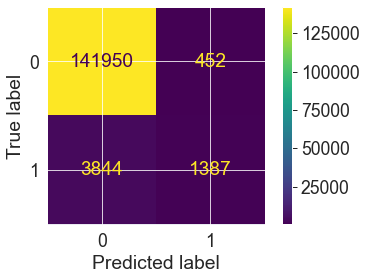

In [96]:
plot_confusion_matrix(rfc, X_te_fin_3, y_test)

The cross validation score of 98.5 is strong, and the precision score of 75 is much higher than what we started with. Unfortunately the F1 score on the fraudulent transaction data is still pretty low, at 39, but on the legitimate transaction data, is nearly perfect at 99. I am certain that I can imporve the model, with more feature engineering and model iterations. 